In [184]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = './NanumGothic.ttf' 
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 아파트 파트 피쳐 엔지니어링(민승)
- 골목상권과 비골목상권 아파트 피처만 추출
- df_gol
- df_etc

In [185]:
df_gol = pd.read_csv('./골목상권_230913.csv')
df_etc = pd.read_csv('./골목상권외(배후지제거)_230913.csv')

In [186]:
df_gol.columns

Index(['매출', '기준_년_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '시간대1', '시간대2',
       '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '총_생활인구_수',
       '시간대_생활인구_수', '월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수',
       '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수',
       '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수'],
      dtype='object')

In [187]:
# cols_golmok1 = ['아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
#        '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
#        '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수']

# cols_golmok2 = ['배후지_아파트_단지_수',
#        '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
#        '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
#        '배후지_아파트_가격_6_억_이상_세대_수']

cols_gol = ['아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']

cols_bae = ['배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수']

cols_etc = ['아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수',
       '아파트_가격_4_억_세대_수', '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수']

In [188]:
print(len(cols_gol))
print(len(cols_etc))

16
8


In [189]:
df_gol = df_gol[cols_gol]
df_etc = df_ect[cols_etc]

In [190]:
for col in cols_bae:
    col_mean = df_gol[col].mean()
    df_gol[col].fillna(col_mean, inplace = True)

In [191]:
df_gol.isnull().sum()

아파트_단지_수                  0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
배후지_아파트_단지_수              0
배후지_아파트_가격_1_억_미만_세대_수    0
배후지_아파트_가격_1_억_세대_수       0
배후지_아파트_가격_2_억_세대_수       0
배후지_아파트_가격_3_억_세대_수       0
배후지_아파트_가격_4_억_세대_수       0
배후지_아파트_가격_5_억_세대_수       0
배후지_아파트_가격_6_억_이상_세대_수    0
dtype: int64

## 골목/비골목상권의 이상치와 분포를 시각화
- 박스 플랏
- 히스토그램

### 1-1. 골목상권 이상치(box-plot)

In [192]:
df_gol.head()

,아파트_단지_수,아파트_가격_1_억_미만_세대_수,아파트_가격_1_억_세대_수,아파트_가격_2_억_세대_수,아파트_가격_3_억_세대_수,아파트_가격_4_억_세대_수,아파트_가격_5_억_세대_수,아파트_가격_6_억_이상_세대_수,배후지_아파트_단지_수,배후지_아파트_가격_1_억_미만_세대_수,배후지_아파트_가격_1_억_세대_수,배후지_아파트_가격_2_억_세대_수,배후지_아파트_가격_3_억_세대_수,배후지_아파트_가격_4_억_세대_수,배후지_아파트_가격_5_억_세대_수,배후지_아파트_가격_6_억_이상_세대_수
0,0.804816,0.000000,0.804816,2.736374,1.287706,1.609632,1.126742,10.462608,9.174903,0.804816,41.689470,26.237002,10.301645,8.370087,6.760455,290.055693
1,5.517241,1.724138,26.206897,14.137931,3.103448,1.724138,1.034483,7.586207,37.241379,3.793103,150.344828,106.551724,41.034483,27.931034,23.448276,37.586207
2,12.483240,0.462342,60.566832,41.148458,10.633871,3.698738,0.924684,1.387027,79.985205,11.096213,360.626936,445.697906,57.330436,69.813676,37.912063,63.803227
3,0.753807,0.000000,7.035529,0.502538,0.753807,0.000000,0.000000,0.251269,13.065983,1.507613,71.611639,56.786773,16.835017,12.312176,12.563445,17.086286
4,9.166527,2.147586,51.070650,25.928176,6.914180,7.333222,3.561850,5.604677,20.847301,3.980892,121.102917,81.346379,17.023550,13.723600,10.685551,14.980724


In [193]:
df_gol.describe()
df_gol.isnull().sum()

아파트_단지_수                  0
아파트_가격_1_억_미만_세대_수        0
아파트_가격_1_억_세대_수           0
아파트_가격_2_억_세대_수           0
아파트_가격_3_억_세대_수           0
아파트_가격_4_억_세대_수           0
아파트_가격_5_억_세대_수           0
아파트_가격_6_억_이상_세대_수        0
배후지_아파트_단지_수              0
배후지_아파트_가격_1_억_미만_세대_수    0
배후지_아파트_가격_1_억_세대_수       0
배후지_아파트_가격_2_억_세대_수       0
배후지_아파트_가격_3_억_세대_수       0
배후지_아파트_가격_4_억_세대_수       0
배후지_아파트_가격_5_억_세대_수       0
배후지_아파트_가격_6_억_이상_세대_수    0
dtype: int64

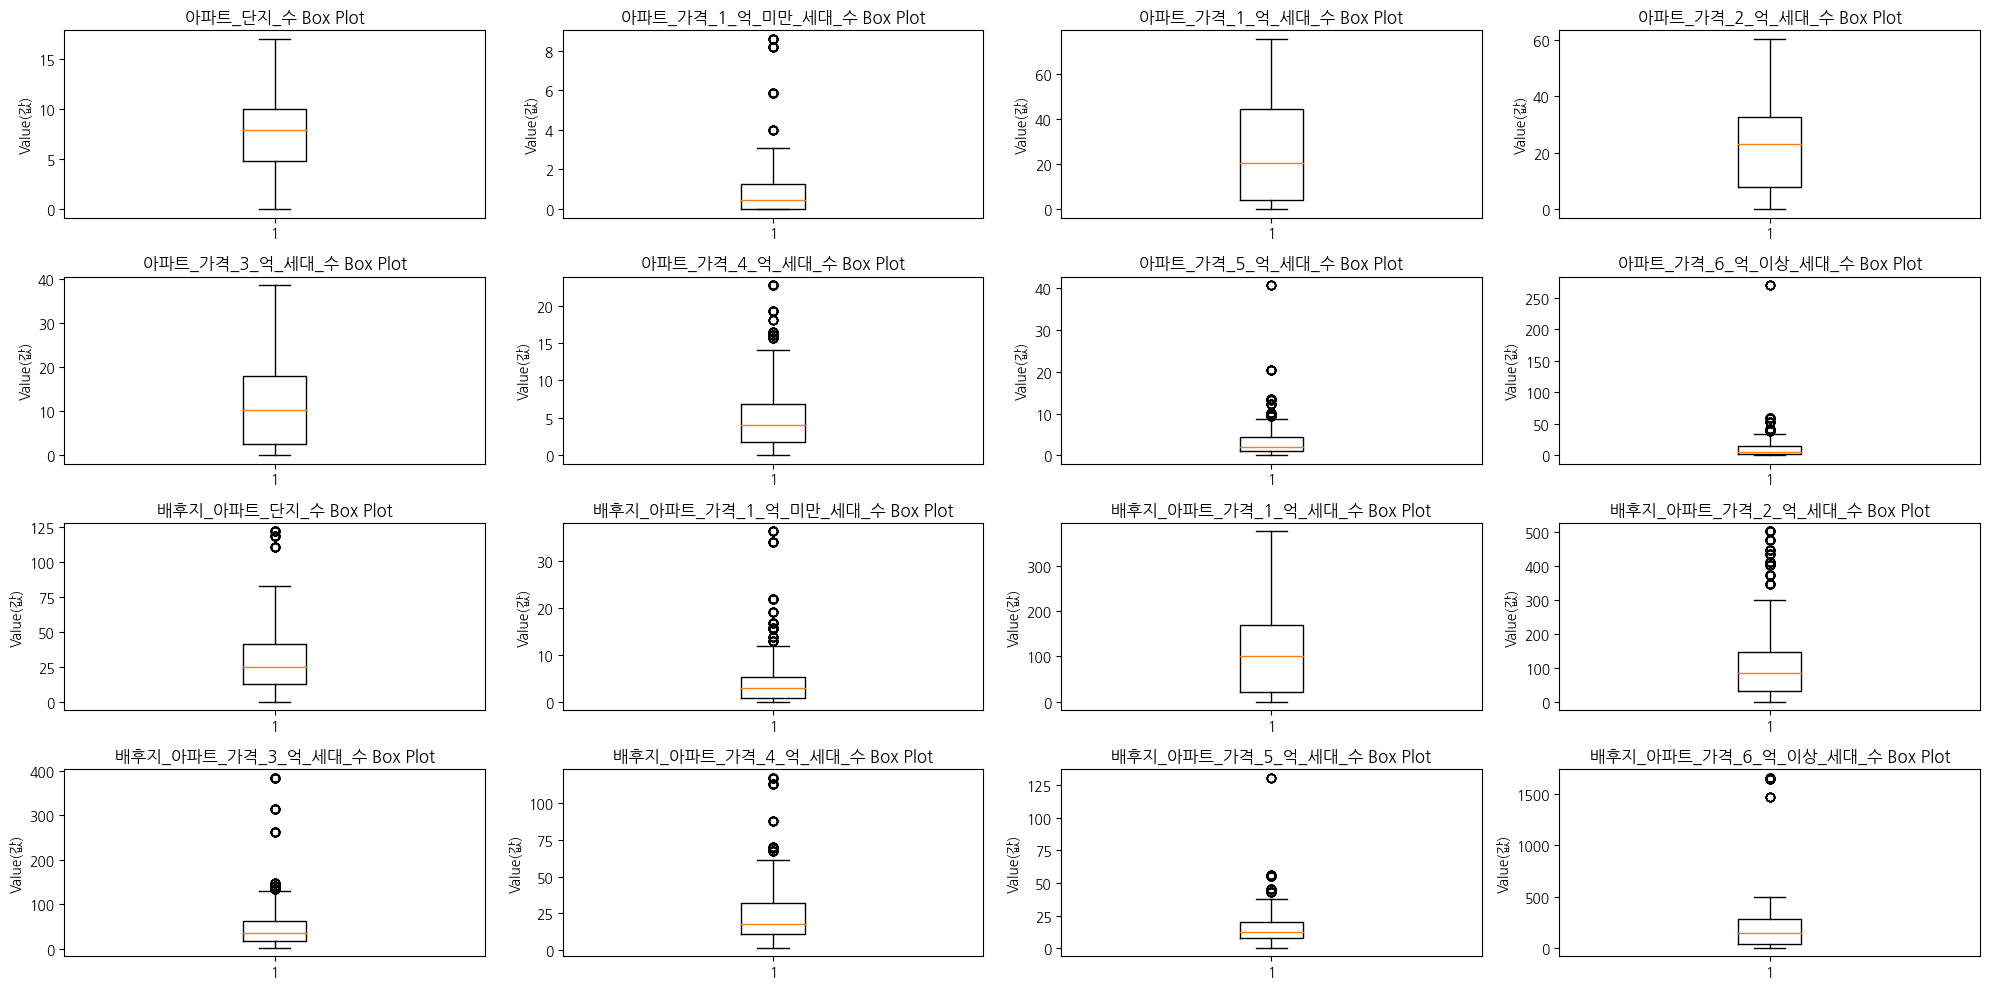

In [194]:
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 10))

for i, col in enumerate(cols_gol):
    row_idx = i // ncols
    col_idx = i % ncols
    axes[row_idx, col_idx].boxplot(df_gol[col])
    axes[row_idx, col_idx].set_title(f'{col} Box Plot')
    axes[row_idx, col_idx].set_ylabel('Value(값)')
    
plt.tight_layout()
plt.show()

### 1-2. 골목상권 분포 확인

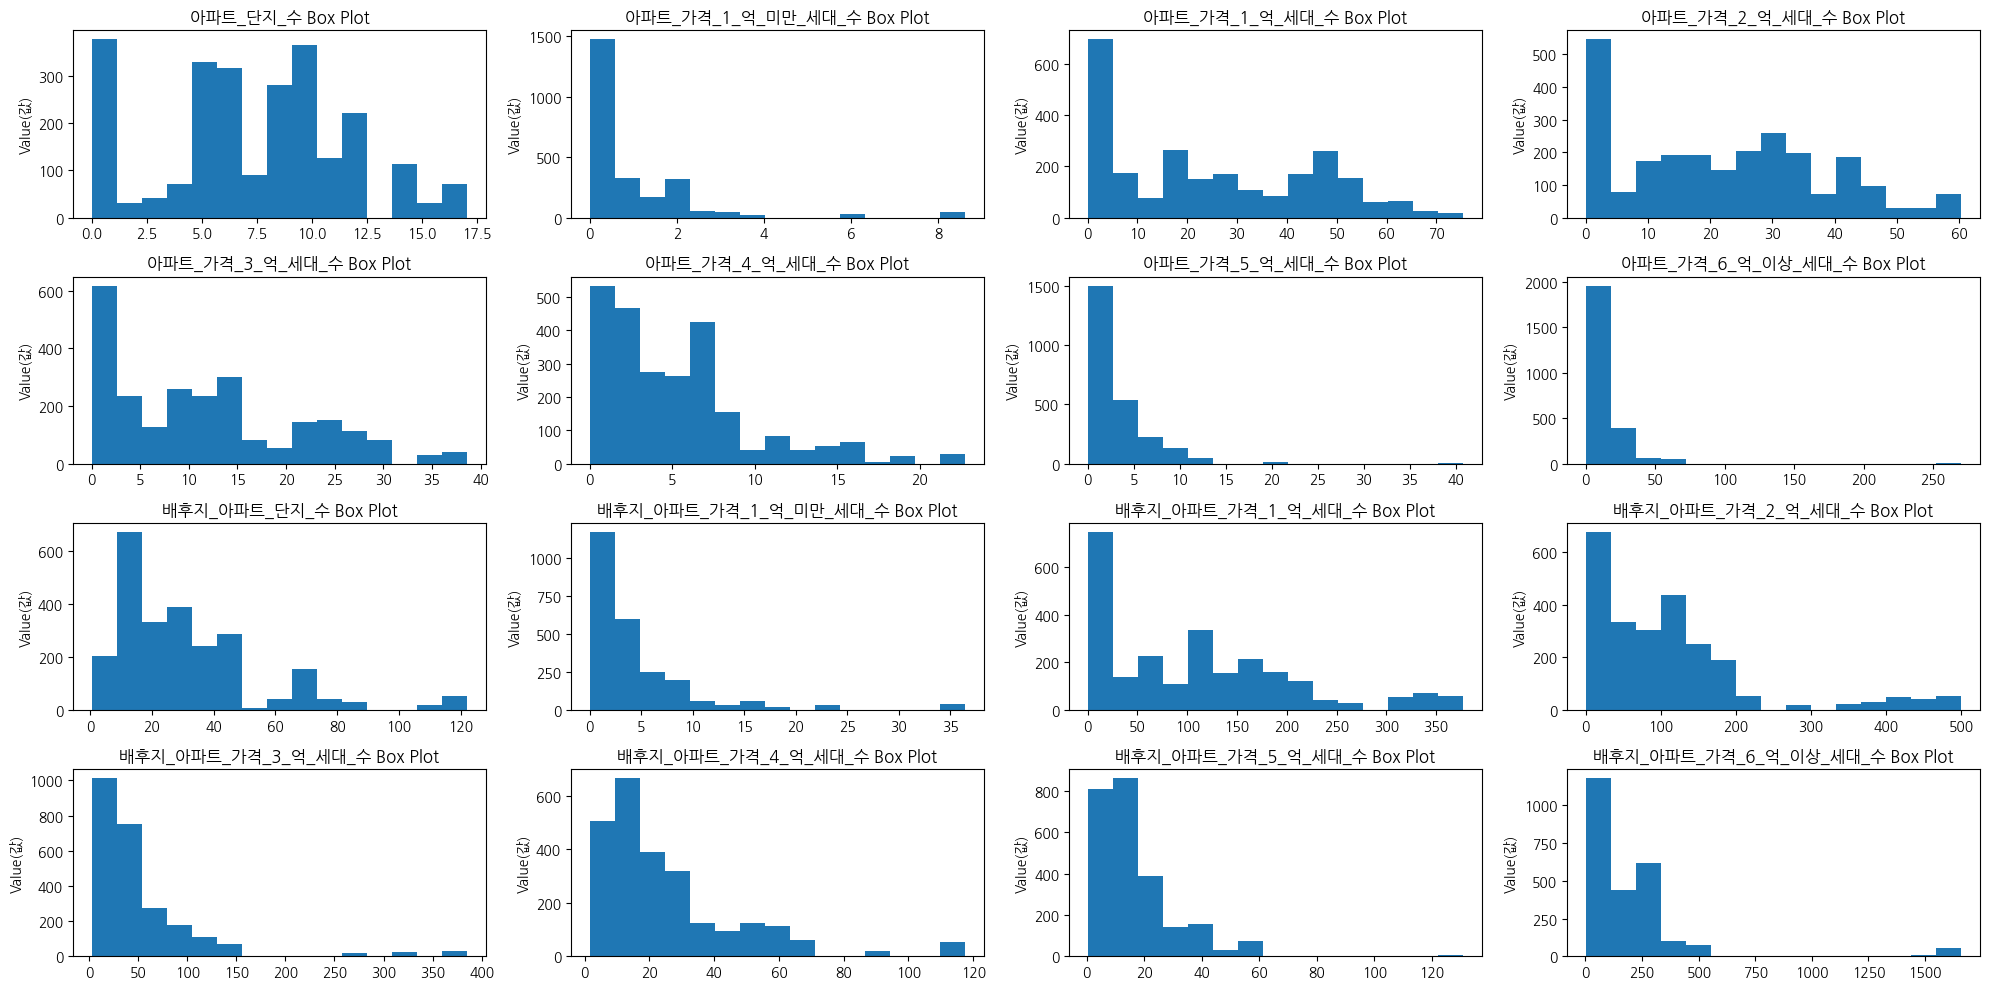

In [195]:
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 10))

for i, col in enumerate(cols_gol):
    row_idx = i // ncols
    col_idx = i % ncols
    axes[row_idx, col_idx].hist(df_gol[col], bins = 15)
    axes[row_idx, col_idx].set_title(f'{col} Box Plot', fontsize = 12)
    axes[row_idx, col_idx].set_ylabel('Value(값)')
    
plt.tight_layout()
plt.show()

### 2-1. 비골목상권 이상치

In [196]:
len(df_etc.columns)

8

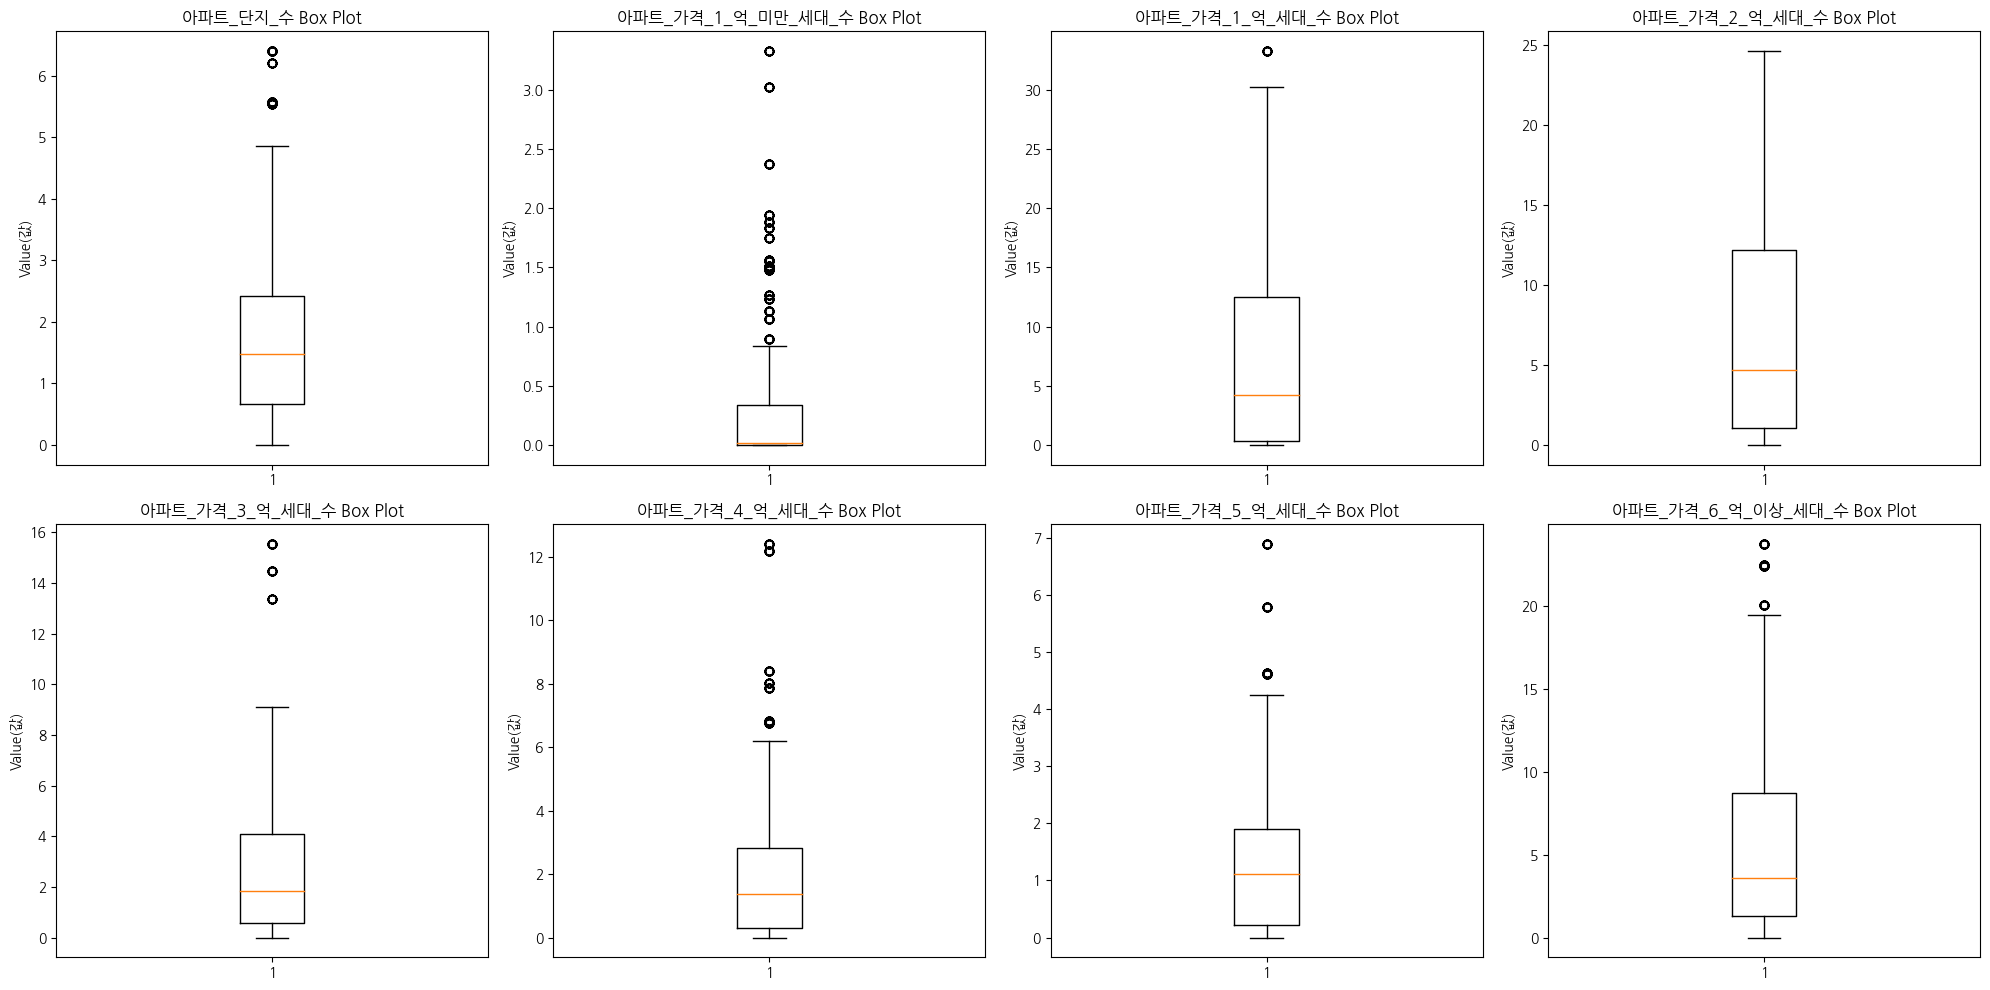

In [197]:
nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10))

for i, col in enumerate(cols_etc):
    row_idx = i // ncols
    col_idx = i % ncols
    axes[row_idx, col_idx].boxplot(df_etc[col])
    axes[row_idx, col_idx].set_title(f'{col} Box Plot')
    axes[row_idx, col_idx].set_ylabel('Value(값)')
    
plt.tight_layout()
plt.show()

### 2-2. 비골목상권 분포

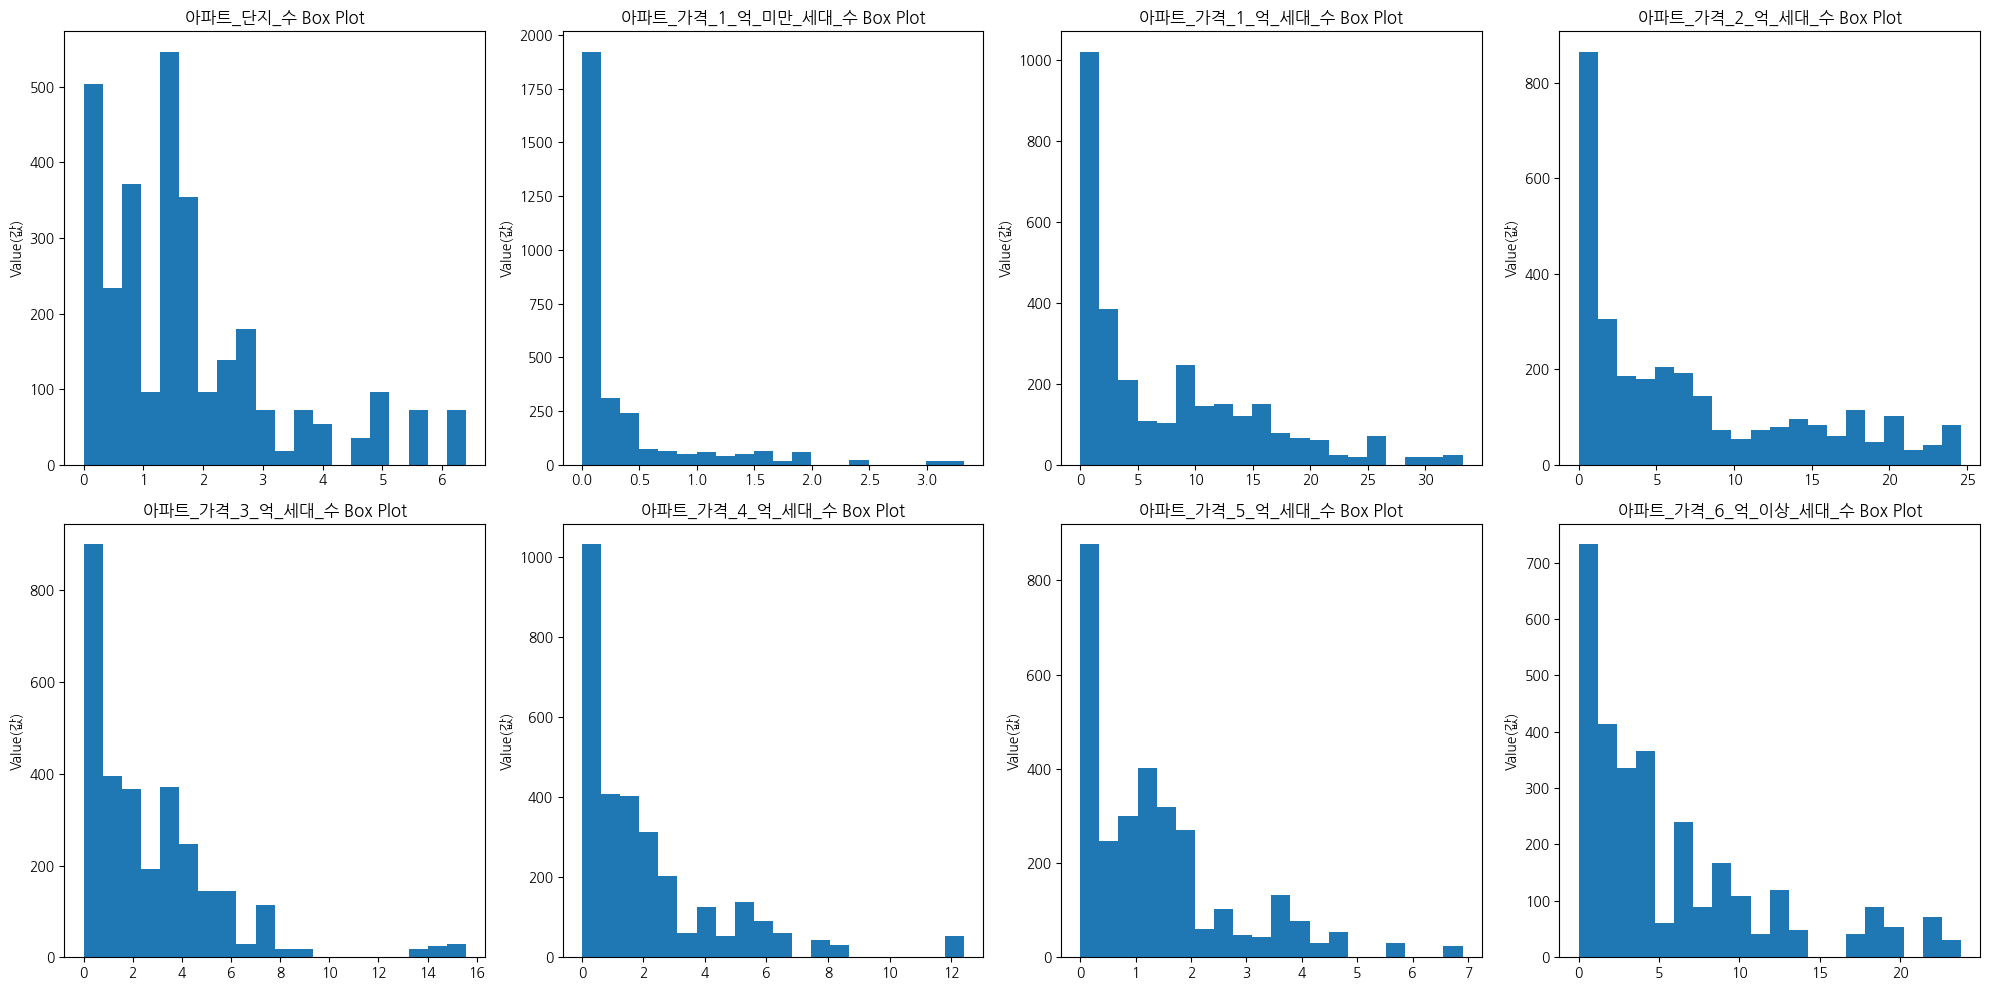

In [198]:
nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10))

for i, col in enumerate(cols_etc):
    row_idx = i // ncols
    col_idx = i % ncols
    axes[row_idx, col_idx].hist(df_etc[col], bins = 20)
    axes[row_idx, col_idx].set_title(f'{col} Box Plot')
    axes[row_idx, col_idx].set_ylabel('Value(값)')
    
plt.tight_layout()
plt.show()

## IQR을 기준으로 이상치 탐색

In [199]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    # print('IQR은',iqr, '이다.')     
    # print('lower bound 값은', lower, '이다.')     
    # print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]   
    
    num_outliers = data1.shape[0] + data2.shape[0]
    
    # 이상치 총 개수 구하기
    return num_outliers

# print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')
# print(f'총 이상치 비율 : ')

### 골목상권

In [200]:
for i in cols_gol:
    print(f'col:{i}')
    result = outlier_iqr(df_gol, i)
    result_ratio = round(result/df_gol[i].shape[0] * 100, 2)
    print(f'이상치 개수: {result}')
    print(f'이상치 비율: {result_ratio}%')
    print('\n')

col:아파트_단지_수
이상치 개수: 0
이상치 비율: 0.0%


col:아파트_가격_1_억_미만_세대_수
이상치 개수: 90
이상치 비율: 3.64%


col:아파트_가격_1_억_세대_수
이상치 개수: 0
이상치 비율: 0.0%


col:아파트_가격_2_억_세대_수
이상치 개수: 0
이상치 비율: 0.0%


col:아파트_가격_3_억_세대_수
이상치 개수: 0
이상치 비율: 0.0%


col:아파트_가격_4_억_세대_수
이상치 개수: 126
이상치 비율: 5.1%


col:아파트_가격_5_억_세대_수
이상치 개수: 156
이상치 비율: 6.31%


col:아파트_가격_6_억_이상_세대_수
이상치 개수: 120
이상치 비율: 4.85%


col:배후지_아파트_단지_수
이상치 개수: 72
이상치 비율: 2.91%


col:배후지_아파트_가격_1_억_미만_세대_수
이상치 개수: 186
이상치 비율: 7.52%


col:배후지_아파트_가격_1_억_세대_수
이상치 개수: 0
이상치 비율: 0.0%


col:배후지_아파트_가격_2_억_세대_수
이상치 개수: 198
이상치 비율: 8.01%


col:배후지_아파트_가격_3_억_세대_수
이상치 개수: 144
이상치 비율: 5.83%


col:배후지_아파트_가격_4_억_세대_수
이상치 개수: 132
이상치 비율: 5.34%


col:배후지_아파트_가격_5_억_세대_수
이상치 개수: 132
이상치 비율: 5.34%


col:배후지_아파트_가격_6_억_이상_세대_수
이상치 개수: 60
이상치 비율: 2.43%




### 비골목상권

In [201]:
for i in cols_etc:
    print(f'col:{i}')
    result = outlier_iqr(df_etc, i)
    print(f'이상치 개수: {result}')
    print(f'이상치 비율: {round(result/df_etc[i].shape[0] * 100, 2)}%')
    print('\n')

col:아파트_단지_수
이상치 개수: 144
이상치 비율: 4.78%


col:아파트_가격_1_억_미만_세대_수
이상치 개수: 384
이상치 비율: 12.75%


col:아파트_가격_1_억_세대_수
이상치 개수: 24
이상치 비율: 0.8%


col:아파트_가격_2_억_세대_수
이상치 개수: 0
이상치 비율: 0.0%


col:아파트_가격_3_억_세대_수
이상치 개수: 72
이상치 비율: 2.39%


col:아파트_가격_4_억_세대_수
이상치 개수: 186
이상치 비율: 6.18%


col:아파트_가격_5_억_세대_수
이상치 개수: 108
이상치 비율: 3.59%


col:아파트_가격_6_억_이상_세대_수
이상치 개수: 132
이상치 비율: 4.38%




## 상관관계 분석

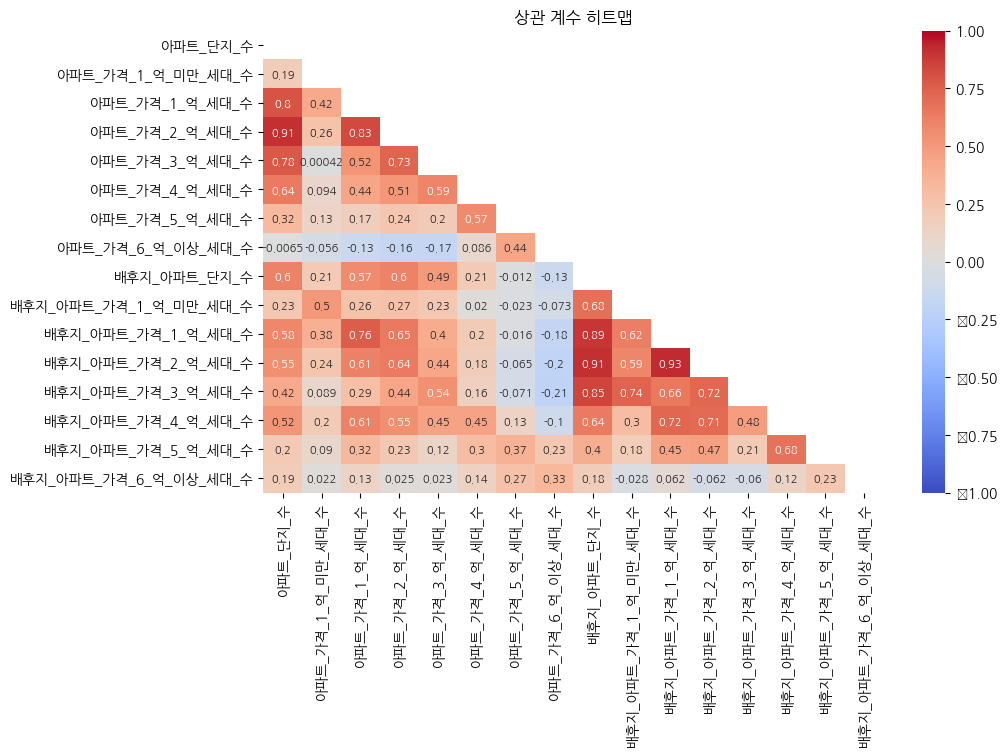

In [221]:
correlation_matrix = df_gol.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# mask |= correlation_matrix < 0.4

plt.figure(figsize=(10, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask = mask, annot_kws={"size": 8})
plt.title('상관 계수 히트맵')
plt.show()